In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,LSTM

In [116]:
folder_path="data"
lists=['ScrollUp','ScrollDown','SwipeRight','SwipeLeft','Neutral']

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
data = datagen.flow_from_directory(directory='data', target_size=(256, 256), batch_size=16,subset='training',shuffle=True)

validation=datagen.flow_from_directory(directory='data', target_size=(256, 256), batch_size=16,subset='validation',shuffle=True)


Found 343 images belonging to 5 classes.
Found 84 images belonging to 5 classes.


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D
model=Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(256,256,3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [56]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [57]:
hist = model.fit(data, epochs=5, validation_data=validation)


Epoch 1/5
22/22 [==============================] - 5s 181ms/step - loss: 0.8191 - accuracy: 0.7464 - val_loss: 0.1178 - val_accuracy: 0.9643
Epoch 2/5
22/22 [==============================] - 4s 175ms/step - loss: 0.0887 - accuracy: 0.9679 - val_loss: 0.0810 - val_accuracy: 0.9762
Epoch 3/5
22/22 [==============================] - 4s 175ms/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 4/5
22/22 [==============================] - 4s 176ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 5/5
22/22 [==============================] - 4s 177ms/step - loss: 5.3719e-04 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000


In [58]:
import cv2
from matplotlib import pyplot as plt

In [112]:
def predict(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    yhat = model.predict(np.expand_dims(resize/255,0))
    #predictions 
    predicted_class = np.argmax(yhat)

    # Map the class label to its corresponding class name
    class_names = data.class_indices
    predicted_class_name = [k for k, v in class_names.items() if v == predicted_class][0]
    
    return predicted_class_name


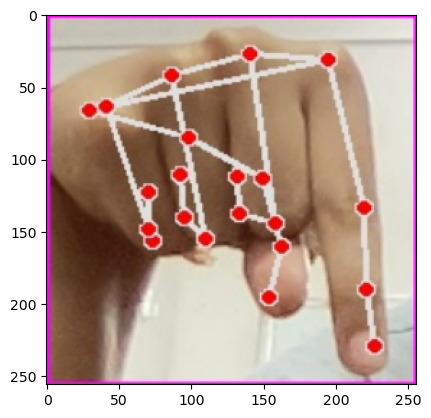

1/1 [==============================] - 0s 22ms/step


'ScrollDown'

In [125]:
img=cv2.imread('test/image_1690992100.181071.jpg')
predict(img)